0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.023413720440177945), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.005118231139318251), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.04878048780487805), interact_mode=transmit)
4 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.06693440428380187), interact_mode=transmit)
6 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
7 Surface(profile=Spherical(c=-0.06693440428380187), interact_mode=transmit)
8 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
9 Surface(profile=Spherical(c=-0.04878048780487805), interact_mode=transmit)
10 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
11 Surface(profile=Spherical(c=-0.023413720440177945), interact_mode=transmit)
12 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)
0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=3.99, medium=Glass(nd=1.7343, vd

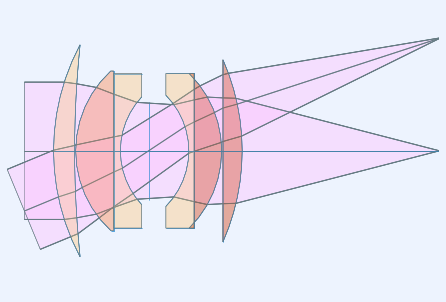

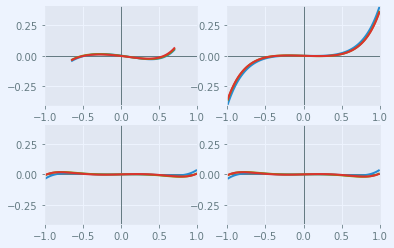

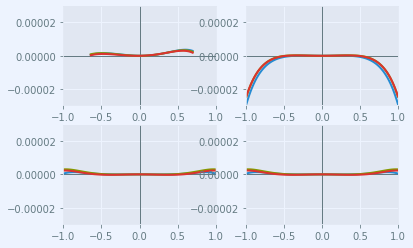

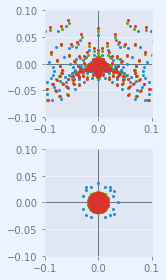

In [5]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# US 4,123,144 Example 8 (Leica Summicron R 50mm f/2)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=2)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 22.5])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'US 4,123,144 Example 8 (Leica Summicron R 50mm f/2)'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([42.71,3.99,1.7343,28.19])
sm.ifcs[-1].max_aperture = 14.47
sm.add_surface([195.38,0.2])
sm.ifcs[-1].max_aperture = 13.53
sm.add_surface([20.5,7.18,1.67133,41.64])
sm.ifcs[-1].max_aperture = 12.01
sm.add_surface([0,1.29,1.7919,25.55])
sm.ifcs[-1].max_aperture = 10.745
sm.add_surface([14.94,5.35])
sm.ifcs[-1].max_aperture = 9.195
sm.add_surface([0,7.61])
sm.set_stop()
sm.ifcs[-1].max_aperture = 9.0295
sm.add_surface([-14.94,1,1.65222,33.6])
sm.ifcs[-1].max_aperture = 8.75
sm.add_surface([0,5.22,1.79227,47.15])
sm.ifcs[-1].max_aperture = 9.635
sm.add_surface([-20.5,0.2])
sm.ifcs[-1].max_aperture = 10.19
sm.add_surface([0,3.69,1.79227,47.15])
sm.ifcs[-1].max_aperture = 11.48
sm.add_surface([-42.71,37.32])
sm.ifcs[-1].max_aperture = 11.985
sm.list_surfaces()
sm.list_gaps()
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()
